<a href="https://colab.research.google.com/github/HafizahBaha/BIOREM_Network/blob/main/Session_2_WCNTDA2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SESSION 2: INTRO TO NETWORKS WITH IGRAPH**

**15 May 2023**

**Alyssa April Dellow**

## **Objectives**

The objectives of this session are to:
1.   Gain a basic understanding of networks.
2.   Visualise and analyse networks using the igraph package in R.
3.   Implement a simple complex network analysis method on time series data of stocks via the threshold method.


## **Using the R programming language in Google Colab**
*   R is a programming language mainly used by statistitians. For this session, we will be specifically using the igraph package in R.
*   Through Google Colab, we can execute R code through the browser. This way, we do not need to download any apps for our data analysis.

# **Upload the Data Sets Into Drive**
1.   Download the raw files of all three data sets provided into your laptop.
2.   Click the folder icon on the side menu on your left.
3.   Click the "Upload to session storage" icon (first icon at the top).
4.   Locate the three data sets on your laptop and upload them.




# **What are Networks?**

## Network
*   Networks often **describe** the links/**relationships**/interconnections **among entities** such as people, things etc.
*   Networks are a **collection of** points called **nodes** that are joined together by lines called **edges**.

![picture](https://drive.google.com/uc?export=view&id=1URF8UQ96qvGu_7Hlwzu2boQbsVfOczdT)

## Node
*   In networks, nodes represent **entities**.
*   Nodes are portrayed as **circles**.
*   Nodes are connected to one another by edges.

## Edge
*   Edges represent the **relationship**/connection between nodes.
*   Edges are portrayed as **lines** that connect the nodes together in a network.

## Example of Network
*   In an **actor network**, nodes could represent actors, whereas edges could be formed between actors who have co-stared in a film together.
*   In a **transportation network**, nodes could represent bus stations in a country and the edges could represent the routes between these stations.

# **igraph Package**

igraph is a library collection for creating and manipulating graphs and analyzing networks.

In [ ]:
# install the igraph package that will be used for network analysis
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# load the igraph package so that its functions are available for use
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




# **Undirected and Directed Networks**
*   The edges of a network can be either undirected or directed.
*   Edges in an undirected network do not have a specific direction.
*   On the other hand, edges in a directed network have specific directions.

***graph_from_literal()***: This function is useful if you want to create a small (named) network quickly, it works for both directed and undirected graphs.

Note that "<-" is an assigment operator in R. It assigns the values on the right to the variable that you name yourself on the left.

## Undirected Network

In [ ]:
# For example, a network of friends.
# If Sam is friends with Alina, Alina is also friends with Sam.
undirected_network <- graph_from_literal("Sam"-"Alina", "John"-"Sam", "Carrie"-"Anthony",
                        "John"-"Alina", "Anthony"-"Kelly", "Kelly"-"Carrie",
                        "Sam"-"Carrie", "Carrie"-"John")

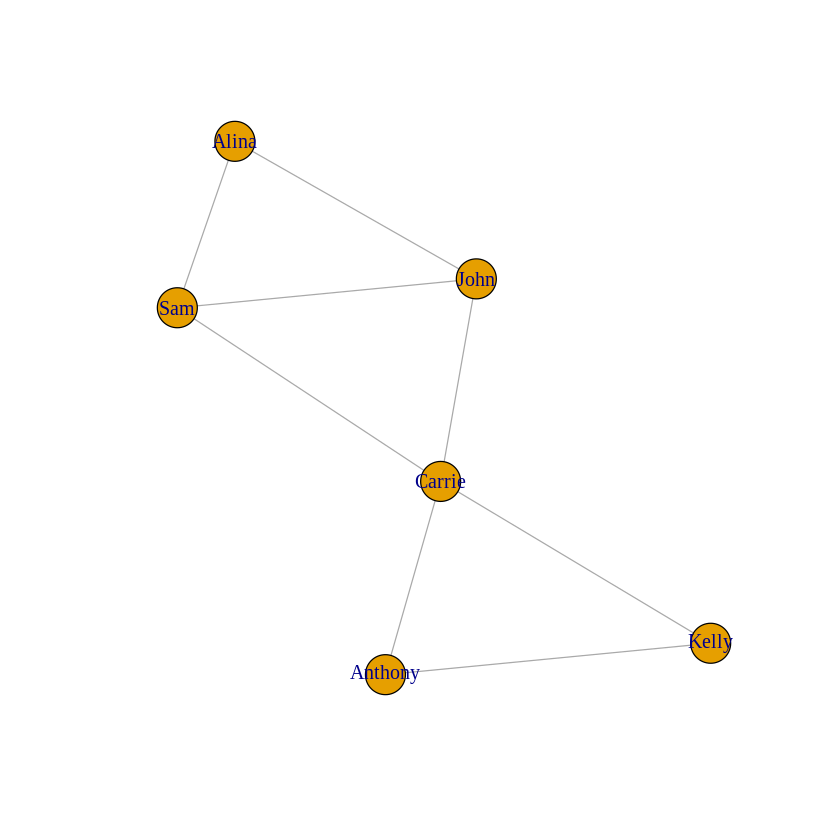

In [ ]:
# use plot function to plot the friendship network
plot(undirected_network)

## Directed Network

In directed networks, edges will be created only if the edge operator includes an arrow head (‘+’) at the end of the edge.

|Operator| Description|
|----------                |:-------------|
|A -+ B|The edge points from A to B|
|A ++ B|The edge points from A to B and also from B to A|



In [ ]:
# For example, a network of phone calls.
# Sam made a phone call to Alina.
# Carrie and Anthony both called each other.
directed_network <- graph_from_literal("Sam"-+"Alina", "John"-+"Sam",
                                      "Carrie"++"Anthony", "John"-+"Alina",
                                      "Anthony"-+"Kelly", "Kelly"++"Carrie",
                                      "Sam"++"Carrie")

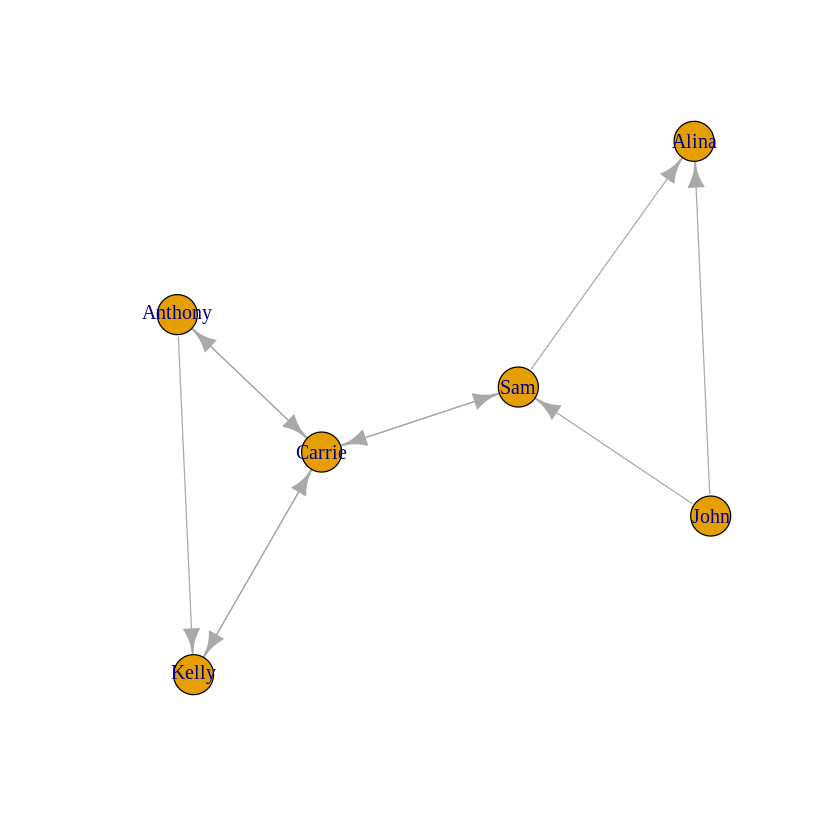

In [ ]:
plot(directed_network)

## Exercise 1

Using **graph_from_literal()** and **plot()**, plot the network below.
*   Name the network *exercise_1*.
*   Pay attention to the arrow directions!

![picture](https://drive.google.com/uc?export=view&id=1i0rVSvcv1KMNoiEvU140PpVs8XuuETP6)






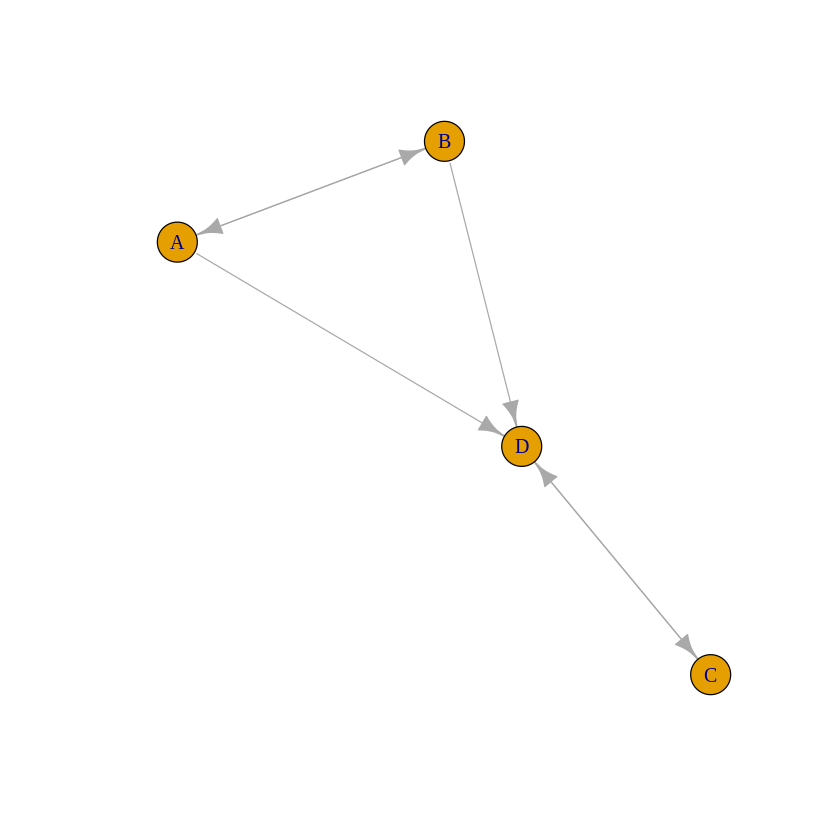

In [ ]:
# Your Exercise 1 Answer

exercise_1 <- graph_from_literal("A"++"B", "A"-+"D", "B"-+"D", "D"++"C")

plot(exercise_1)

# **Networks as igraph Objects**

## Directed Network

Firstly, we will work on **directed** networks using the **email.csv** data set. It shows the **email correspondence** between five individuals.
This data set consists of three columns as follows:

|Column|Description|
|----------                |:-------------|
|1|Start point of the edge, that is the person who sends the email|
|2|End point of the edge, that is the person who receives the email|
|3|Frequency of email correspondence|

This data set is called an **edge list**, where every relationship in the network is listed down. An edge list must at least have the first two columns mentioned. The third column just stores additional information about the edges.  

### Read In Data

In [ ]:
# read in the data set by copying the data set path from the "three dots"
# at the side menu
email_data <- read.csv("/content/email.csv")

In [ ]:
# the str() function displays the structure of an R object
str(email_data)

# Here we can see that the structure of email_data is a data frame.
# A data frame is a data structure that organizes data into a 2-dimensional
# table of rows and columns.

'data.frame':	13 obs. of  3 variables:
 $ from: chr  "Fatimah" "Fatimah" "Fatimah" "Fatimah" ...
 $ to  : chr  "Giovanni" "Henrik" "Michael" "Paul" ...
 $ freq: int  1 1 12 4 5 1 2 10 2 8 ...


### Convert Data Frame to igraph Object

In [ ]:
# Before we can do any network analysis, we must convert the data frame
# into an igraph object.
email_network <- graph_from_data_frame(email_data)

In [ ]:
# this is now an igraph object
email_network

IGRAPH 8336b4d DN-- 5 13 -- 
+ attr: name (v/c), freq (e/n)
+ edges from 8336b4d (vertex names):
 [1] Fatimah ->Giovanni Fatimah ->Henrik   Fatimah ->Michael  Fatimah ->Paul    
 [5] Giovanni->Fatimah  Giovanni->Henrik   Giovanni->Paul     Henrik  ->Fatimah 
 [9] Henrik  ->Paul     Michael ->Fatimah  Michael ->Paul     Paul    ->Henrik  
[13] Paul    ->Michael 

**How do we read the output above?**
*   The **D** means that the network is **directed**. It would be **U** if it were an **undirected** network.
*   The **N** means that the network has its **name attribute set**. These will be the labels of the nodes.
*   There are also **5 nodes** and **13 edges**.



### Plot the Network

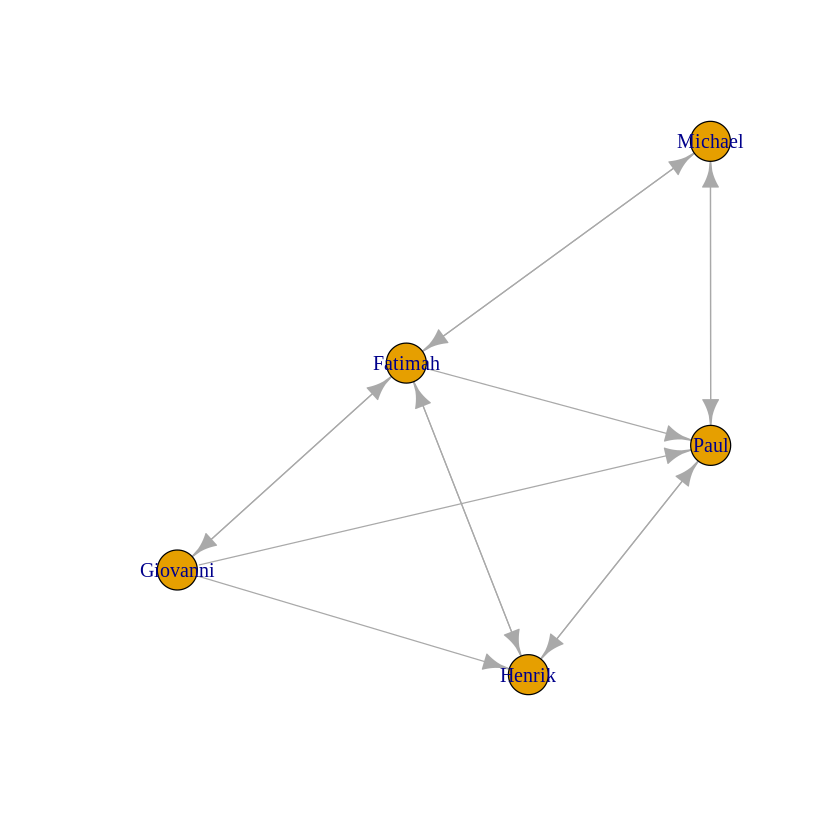

In [ ]:
plot(email_network)

Notice that everytime we run the plot function above, the visualisation changes. Therefore, we can use the **set.seed()** function. You can use any arbitrary number that you desire until you obtain a visualisation that you're happy with. By using the same seed, all of us will obtain a **similar visualisation**.

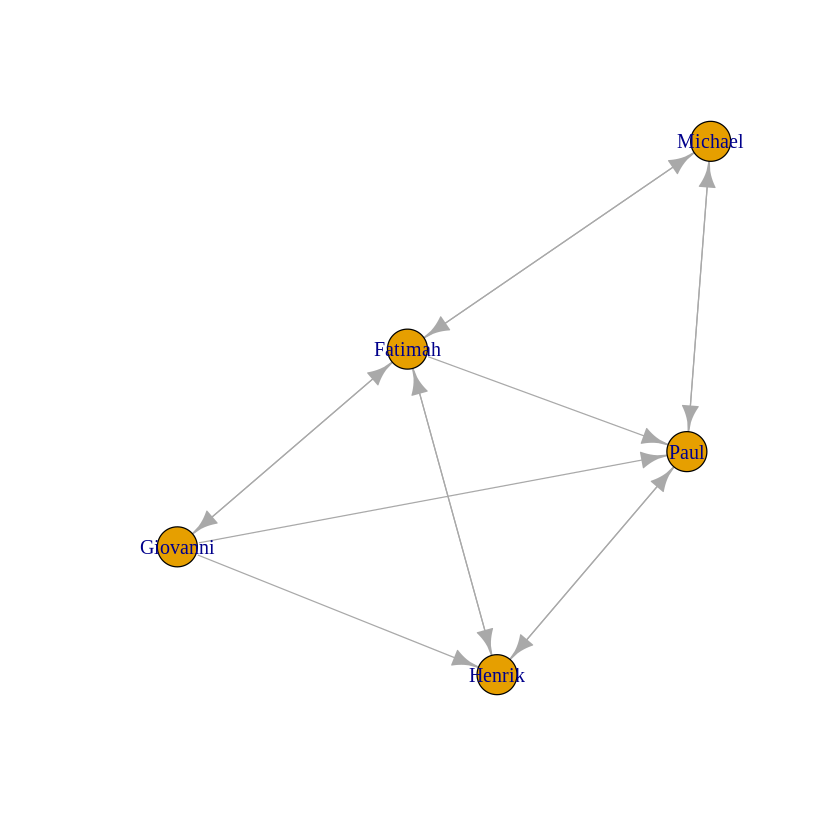

In [ ]:
set.seed(123)
plot(email_network)

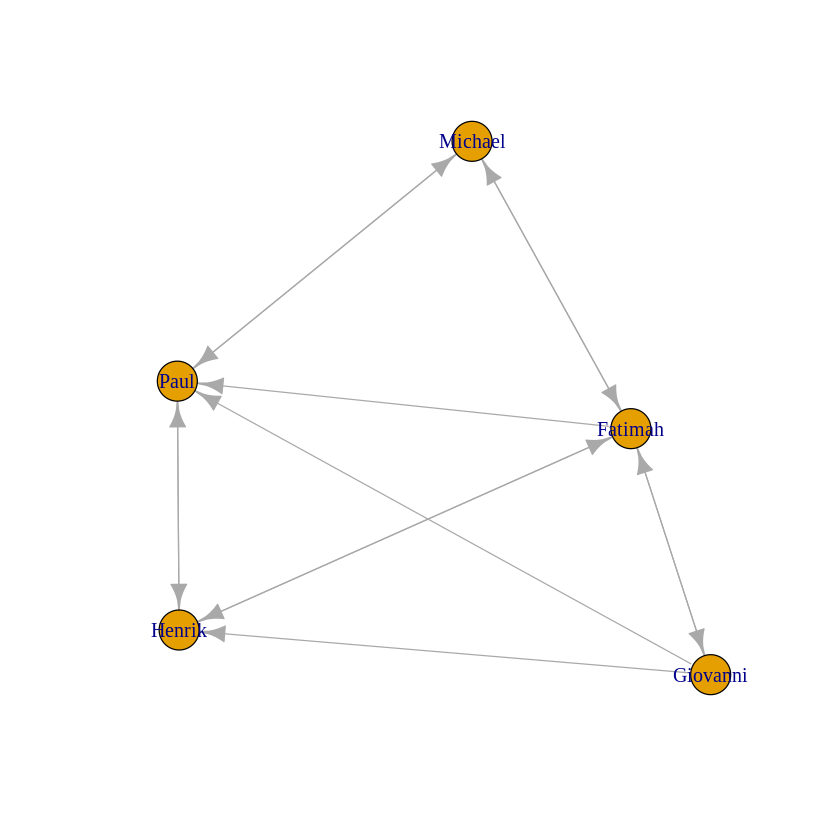

In [ ]:
set.seed(333)
plot(email_network)

### Nodes and Edges of a Network with Their Attributes

In [ ]:
# Use the V() function to obtain the nodes in a network.
# Make sure to use a capital V! --> V for vertices, another name for nodes.
V(email_network)

# We see that there are 5 nodes representing 5 individuals.

+ 5/5 vertices, named, from 8336b4d:
[1] Fatimah  Giovanni Henrik   Michael  Paul    

In [ ]:
# Use the E() function to obtain the edges in a network.
E(email_network)

# We see that there are 13 edges representing the email correspondence.

+ 13/13 edges from 8336b4d (vertex names):
 [1] Fatimah ->Giovanni Fatimah ->Henrik   Fatimah ->Michael  Fatimah ->Paul    
 [5] Giovanni->Fatimah  Giovanni->Henrik   Giovanni->Paul     Henrik  ->Fatimah 
 [9] Henrik  ->Paul     Michael ->Fatimah  Michael ->Paul     Paul    ->Henrik  
[13] Paul    ->Michael 

In [ ]:
# Use gorder() to find the number of nodes in a network.
gorder(email_network)

[1] 5

In [ ]:
# Use gsize() to find the number of edges in a network.
gsize(email_network)

[1] 13

In [ ]:
# Use vertex_attr to obtain the attributes of the nodes in a network.
# These attributes contain information on the nodes.
vertex_attr(email_network)

# Here, the nodes only have the attribute "name".

$name
[1] "Fatimah"  "Giovanni" "Henrik"   "Michael"  "Paul"

In [ ]:
# Use edge_attr to obtain the attributes of the edges in a network.
# These attributes contain information on the edges.
edge_attr(email_network)

# Here, the edges only have the attribute "freq".

$freq
 [1]  1  1 12  4  5  1  2 10  2  8  3  3  4

In [ ]:
# Besides the attributes from our data set, we can assign new attributes to
# either the nodes or edges.
# Now, we add a node attribute called "gender". The gender of each individual
# is listed out.
vertex_attr(email_network, "gender") <- c("female", "male", "male", "male", "male")

# c() is a function that combines its arguments.

In [ ]:
vertex_attr(email_network)

# Now, we see that the nodes have two attributes, namely "name" and "gender".

$name
[1] "Fatimah"  "Giovanni" "Henrik"   "Michael"  "Paul"    

$gender
[1] "female" "male"   "male"   "male"   "male"

In [ ]:
# We can solely access the values in an attribute using the $ operator.
V(email_network)$name

[1] "Fatimah"  "Giovanni" "Henrik"   "Michael"  "Paul"

In [ ]:
V(email_network)$gender

[1] "female" "male"   "male"   "male"   "male"

In [ ]:
E(email_network)$freq

[1]  1  1 12  4  5  1  2 10  2  8  3  3  4

### Subset Nodes/Edges

In [ ]:
# Now, we want to subset nodes/edges according to attributes that
# satisfy certain conditions.
# Firstly, we want only the nodes that are male.
V(email_network)[gender == "male"]

# 4 out of 5 nodes are male

+ 4/5 vertices, named, from 8336b4d:
[1] Giovanni Henrik   Michael  Paul    

In [ ]:
# Secondly, we want only the edges with less than or equal to 3 email correspondence.
E(email_network)[freq <= 3]

# 7 out of 13 edges satisfy this condition

+ 7/13 edges from 8336b4d (vertex names):
[1] Fatimah ->Giovanni Fatimah ->Henrik   Giovanni->Henrik   Giovanni->Paul    
[5] Henrik  ->Paul     Michael ->Paul     Paul    ->Henrik  

In [ ]:
# Use length() to obtain the number of edges in the subset.
length(E(email_network)[freq <= 3])

[1] 7

### Make Your Plots Aesthetic! ✨

There are many arguments that you can insert in the plot() function to beautify your network visualisations. Some basic arguments are listed in the table below.

|Argument|Description|
|----------                |:-------------|
|edge.width|Adjust the thickness of the edges. The edge width defaults to 1. We can set the edges to have a thickness that represents a numeric edge attribute. This way the edges are weighted. |
|edge.curved|Adjust the curvature of the edges. The value can range from 0-1 with 0 being a straight line (no curve).|
|edge.color|Adjust the colour of the edges.|
|vertex.color|Adjust the colour of the nodes.|
|vertex.size|Adjust the size of the nodes. The default node size is 15.|
|vertex.label.cex|Adjust the size of the node fonts.|
|vertex.label.color|Adjust the colour of the node fonts.|
|edge.arrow.size|Adjust the size of the arrow heads. The default size is 1.|

Try out all the arguments above with different values to beautify your plots! It usually requires trial and error for you to obtain a visualisation that suits your needs.

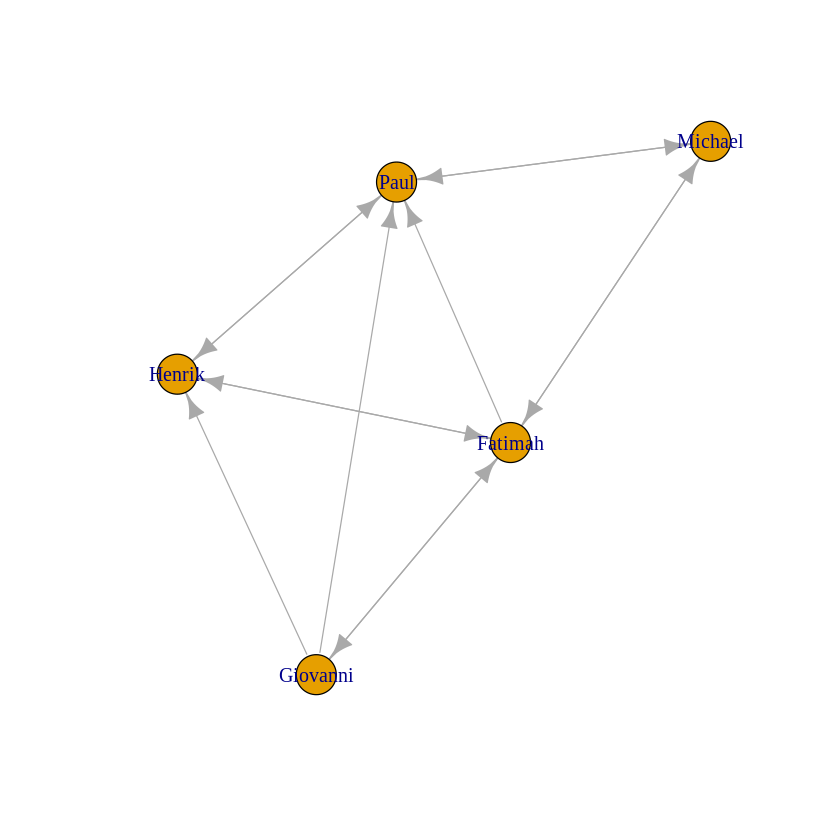

In [ ]:
# Boring!
plot(email_network)

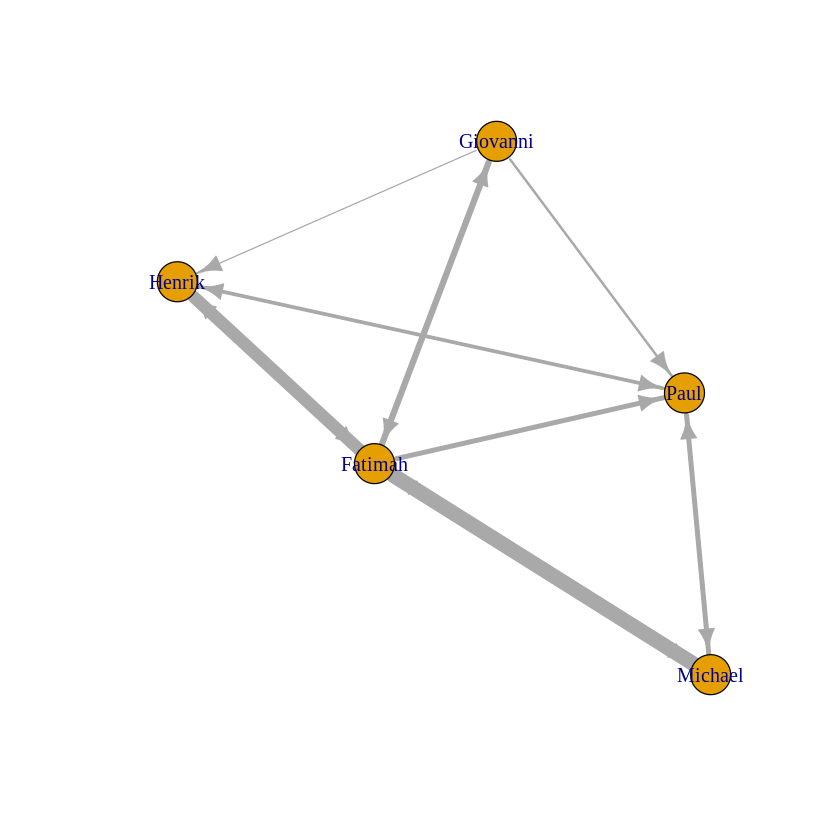

In [ ]:
# Let's set the edge width to the frequency of email correspondence
plot(email_network, edge.width = E(email_network)$freq)

Ooopss! Notice how the **edges overlap** in the network visualisation above. We can't extract from the plot info about Fatimah sending more emails (12) to Michael than Michael sent to Fatimah (8). To fix this, we can:
*   Use **edge.curved** to make the edges more curved, or
*   **Reduce** the **edge width** by multiplying the edge width value with a decimal less than 1, or
*   **Both**



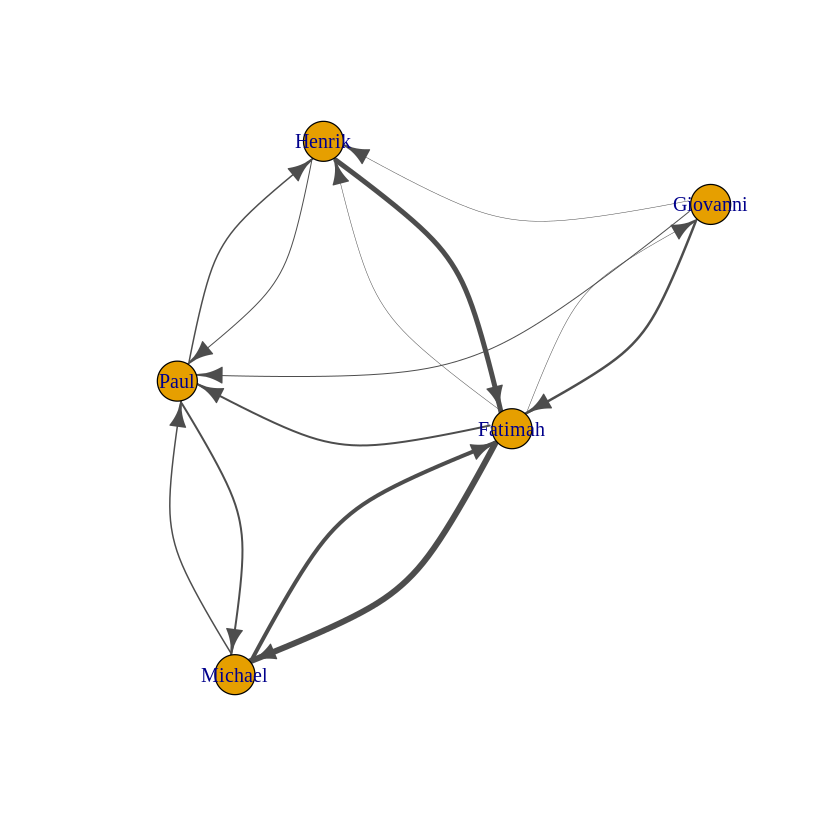

In [ ]:
plot(email_network,
     edge.width = 0.4 * E(email_network)$freq, # reduce edge width by 60%
     edge.curved = 0.4, # make edges 40% curved
     edge.color = "gray30") # make the edges grey in colour

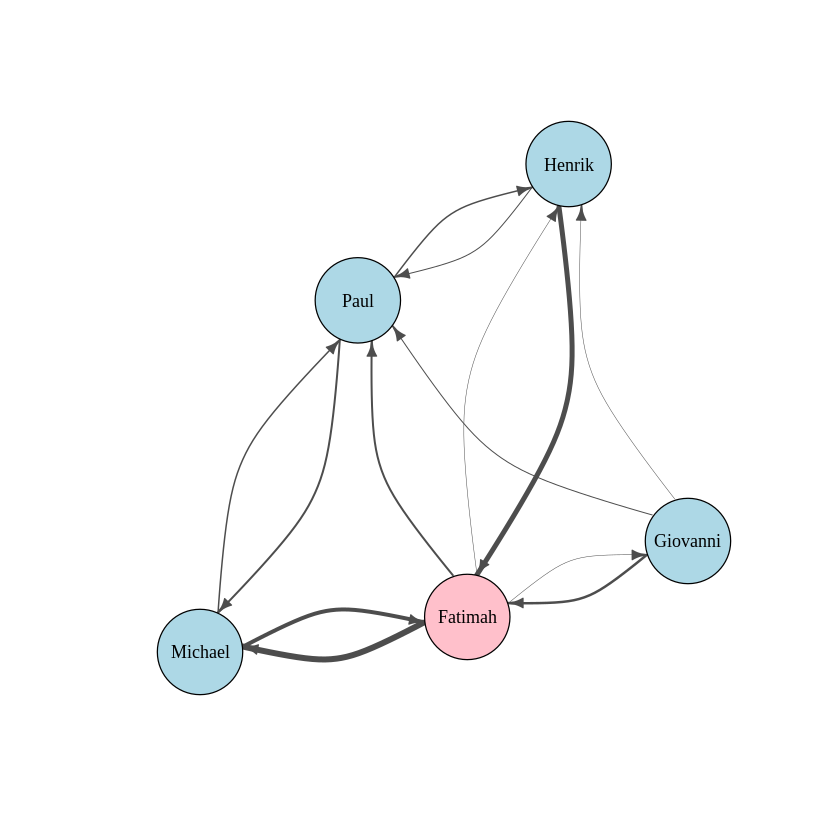

In [ ]:
# You can even set the colour of the nodes according to their
# attributes using edge.color.
# Here, we set the node colours according to the individual's gender.
plot(email_network,
     edge.width = 0.4 * E(email_network)$freq, # reduce edge width by 60%
     edge.curved = 0.4, # make edges 40% curved
     edge.color = "gray30", # make the edges grey in colour
     vertex.color = ifelse(V(email_network)$gender == "female", "pink", "lightblue"),
     vertex.size = 35, # make the nodes bigger
     vertex.label.cex = 0.9, # make the node labels smaller
     vertex.label.color = "black", # make the node labels black in colour
     edge.arrow.size = 0.6) # make the arrow head size smaller

In [ ]:
# You can use colors() to see the list of built-in colours in R.
colors()

[1] "white"                "aliceblue"            "antiquewhite"        
  [4] "antiquewhite1"        "antiquewhite2"        "antiquewhite3"       
  [7] "antiquewhite4"        "aquamarine"           "aquamarine1"         
 [10] "aquamarine2"          "aquamarine3"          "aquamarine4"         
 [13] "azure"                "azure1"               "azure2"              
 [16] "azure3"               "azure4"               "beige"               
 [19] "bisque"               "bisque1"              "bisque2"             
 [22] "bisque3"              "bisque4"              "black"               
 [25] "blanchedalmond"       "blue"                 "blue1"               
 [28] "blue2"                "blue3"                "blue4"               
 [31] "blueviolet"           "brown"                "brown1"              
 [34] "brown2"               "brown3"               "brown4"              
 [37] "burlywood"            "burlywood1"           "burlywood2"          
 [40] "burlywood3"           "burlywood4"           "cadetblue"           
 [43] "cadetblue1"           "cadetblue2"           "cadetblue3"          
 [46] "cadetblue4"           "chartreuse"           "chartreuse1"         
 [49] "chartreuse2"          "chartreuse3"          "chartreuse4"         
 [52] "chocolate"            "chocolate1"           "chocolate2"          
 [55] "chocolate3"           "chocolate4"           "coral"               
 [58] "coral1"               "coral2"               "coral3"              
 [61] "coral4"               "cornflowerblue"       "cornsilk"            
 [64] "cornsilk1"            "cornsilk2"            "cornsilk3"           
 [67] "cornsilk4"            "cyan"                 "cyan1"               
 [70] "cyan2"                "cyan3"                "cyan4"               
 [73] "darkblue"             "darkcyan"             "darkgoldenrod"       
 [76] "darkgoldenrod1"       "darkgoldenrod2"       "darkgoldenrod3"      
 [79] "darkgoldenrod4"       "darkgray"             "darkgreen"           
 [82] "darkgrey"             "darkkhaki"            "darkmagenta"         
 [85] "darkolivegreen"       "darkolivegreen1"      "darkolivegreen2"     
 [88] "darkolivegreen3"      "darkolivegreen4"      "darkorange"          
 [91] "darkorange1"          "darkorange2"          "darkorange3"         
 [94] "darkorange4"          "darkorchid"           "darkorchid1"         
 [97] "darkorchid2"          "darkorchid3"          "darkorchid4"         
[100] "darkred"              "darksalmon"           "darkseagreen"        
[103] "darkseagreen1"        "darkseagreen2"        "darkseagreen3"       
[106] "darkseagreen4"        "darkslateblue"        "darkslategray"       
[109] "darkslategray1"       "darkslategray2"       "darkslategray3"      
[112] "darkslategray4"       "darkslategrey"        "darkturquoise"       
[115] "darkviolet"           "deeppink"             "deeppink1"           
[118] "deeppink2"            "deeppink3"            "deeppink4"           
[121] "deepskyblue"          "deepskyblue1"         "deepskyblue2"        
[124] "deepskyblue3"         "deepskyblue4"         "dimgray"             
[127] "dimgrey"              "dodgerblue"           "dodgerblue1"         
[130] "dodgerblue2"          "dodgerblue3"          "dodgerblue4"         
[133] "firebrick"            "firebrick1"           "firebrick2"          
[136] "firebrick3"           "firebrick4"           "floralwhite"         
[139] "forestgreen"          "gainsboro"            "ghostwhite"          
[142] "gold"                 "gold1"                "gold2"               
[145] "gold3"                "gold4"                "goldenrod"           
[148] "goldenrod1"           "goldenrod2"           "goldenrod3"          
[151] "goldenrod4"           "gray"                 "gray0"               
[154] "gray1"                "gray2"                "gray3"               
[157] "gray4"                "gray5"                "gray6"               
[160] "gray7"              

### Legend

To make our network visualisation **more comprehensible**, we can add a legend to our plot using **legend()**. The legend in this example will be able to explain what the colours of the nodes mean, that is if the individual is a male or female.

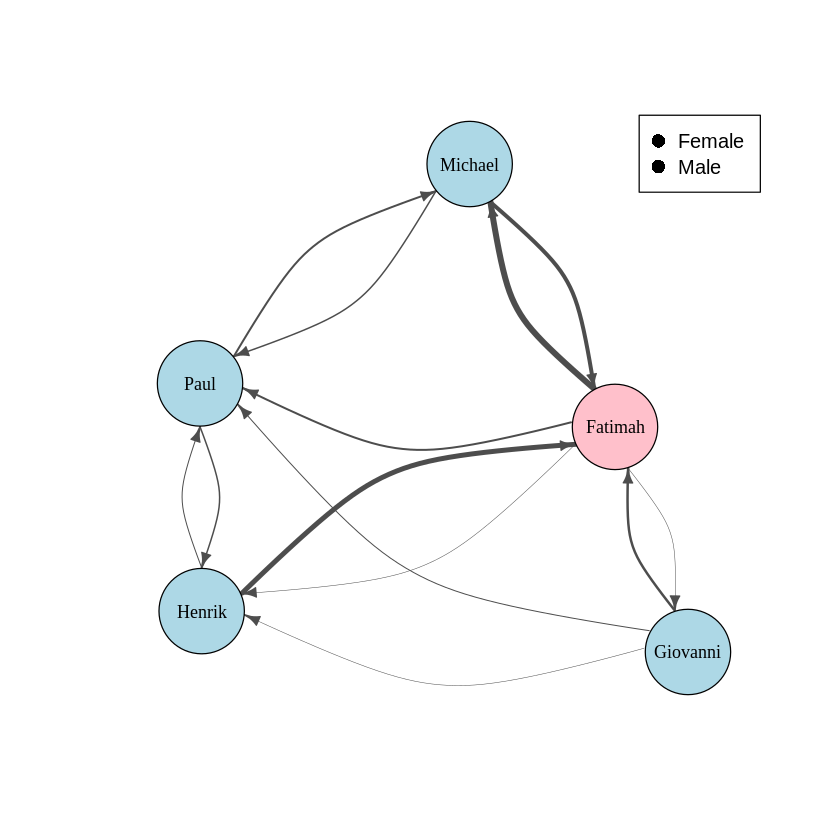

In [ ]:
set.seed(333)
plot(email_network,
     edge.width = 0.4 * E(email_network)$freq, # reduce edge width by 60%
     edge.curved = 0.4, # make edges 40% curved
     edge.color = "gray30", # make the edges grey in colour
     vertex.color = ifelse(V(email_network)$gender == "female", "pink", "lightblue"),
     vertex.size = 35, # make the nodes bigger
     vertex.label.cex = 0.9, # make the node labels smaller
     vertex.label.color = "black", # make the node labels black in colour
     edge.arrow.size = 0.6) # make the arrow head size smaller

legend(x = 0.8, y = 1.2, # set the position of the legend in coordinate form
       legend = c("Female", "Male"), # labels for the legend
       pch = 16, # circles as symbols of the legend
       pt.bg = c("pink", "lightblue"), # colours of the circles
       pt.cex = 1.5) # adjust radius of the circles

This is a list of **pch (plot character)** symbols that can be used as characters in your plots. For the legend, we should use **21** since it is a circle that can be filled with colours of our choice.

![picture](https://drive.google.com/uc?export=view&id=1s1QHrD0l9RMmIkkiDuDxipEqRyZjhM1y)

Source: [STHDA](http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r)

### Exercise 2

Plot the *email_network* with the following requirements:
*   edges that are *60%* curved
*   edges with the colour *darkgreen*
*   nodes that are *yellow* if the individual is *male*, and *violet* if the individual is *female*
*   nodes' size is *40*

Your plot should look something like this.

![picture](https://drive.google.com/uc?export=view&id=1zr2RGb_C8N61hDGTVgL-qWRu0H2f-vsH)


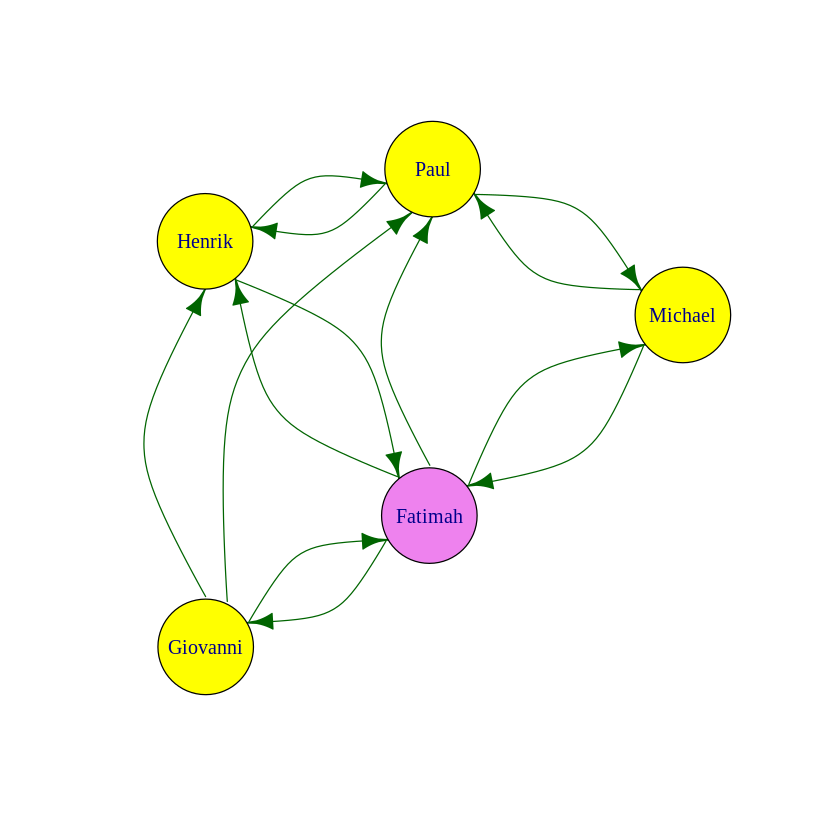

In [ ]:
# Your Exercise 2 Answer
plot(email_network, edge.curved = 0.6, edge.color = "darkgreen",
vertex.color = ifelse(V(email_network)$gender == "male", "yellow", "violet"), vertex.size = 40)

## Undirected Network

Now, we will work on undirected networks using the **karate.csv** data set. The data collection covers **social links among university karate club members**, obtained by Wayne Zachary in 1977. The **nodes represent the members of the university karate club**, whereas the **edges represent a tie between two members of the club**.


### Read In Data

In [ ]:
karate_data <- read.csv("/content/karate.csv")

In [ ]:
str(karate_data)

# Here we can see that the structure of karate_data is also a data frame.

'data.frame':	78 obs. of  2 variables:
 $ vertex1: int  1 1 1 1 1 1 1 1 1 1 ...
 $ vertex2: int  2 3 4 5 6 7 8 9 11 12 ...


### Convert Data Frame to igraph Object

In [ ]:
# set "directed = FALSE" to ensure an undirected network is constructed
karate_network <- graph_from_data_frame(karate_data, directed = FALSE)

In [ ]:
# this is now an igraph object
karate_network

IGRAPH d6b2a18 UN-- 34 78 -- 
+ attr: name (v/c)
+ edges from d6b2a18 (vertex names):
 [1] 1 --2  1 --3  1 --4  1 --5  1 --6  1 --7  1 --8  1 --9  1 --11 1 --12
[11] 1 --13 1 --14 1 --18 1 --20 1 --22 1 --32 2 --3  2 --4  2 --8  2 --14
[21] 2 --18 2 --20 2 --22 2 --31 3 --4  3 --8  3 --9  3 --10 3 --14 3 --28
[31] 3 --29 3 --33 4 --8  4 --13 4 --14 5 --7  5 --11 6 --7  6 --11 6 --17
[41] 7 --17 9 --31 9 --33 9 --34 10--34 14--34 15--33 15--34 16--33 16--34
[51] 19--33 19--34 20--34 21--33 21--34 23--33 23--34 24--26 24--28 24--30
[61] 24--33 24--34 25--26 25--28 25--32 26--32 27--30 27--34 28--34 29--32
[71] 29--34 30--33 30--34 31--33 31--34 32--33 32--34 33--34

**How do we read the output above?**
*   The **U** means that the network is **undirected**.
*   The **N** means that the network has its **name attribute set**. These will be the labels of the nodes.
*   There are also **34 nodes** and **78 edges**.

### Plot the Network

The arguments used to plot an undirected network is similar to that of the directed network from earlier.

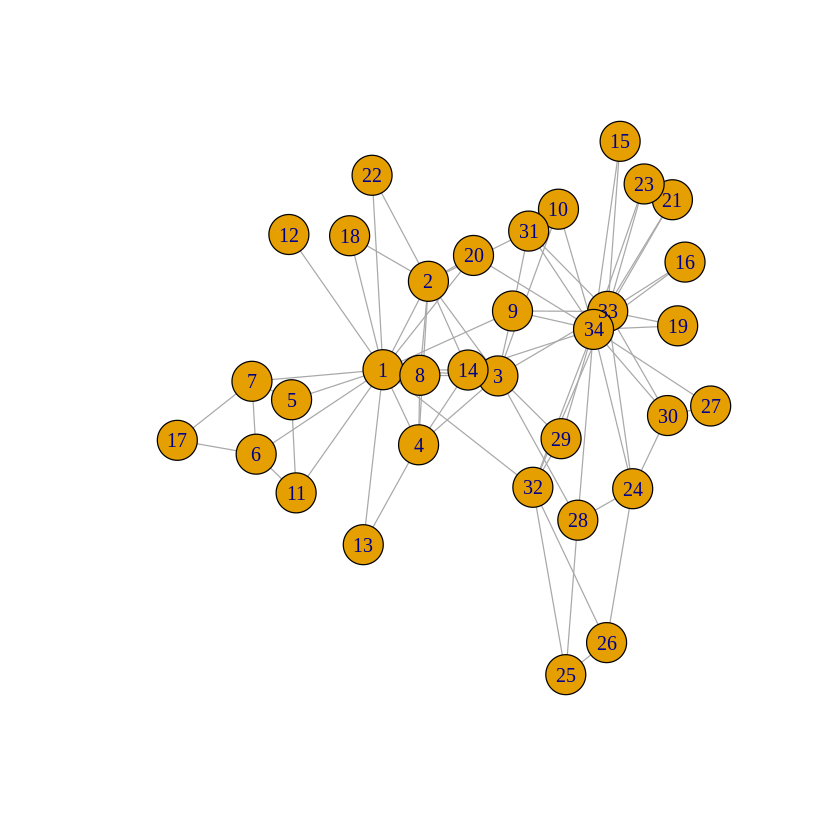

In [ ]:
plot(karate_network)

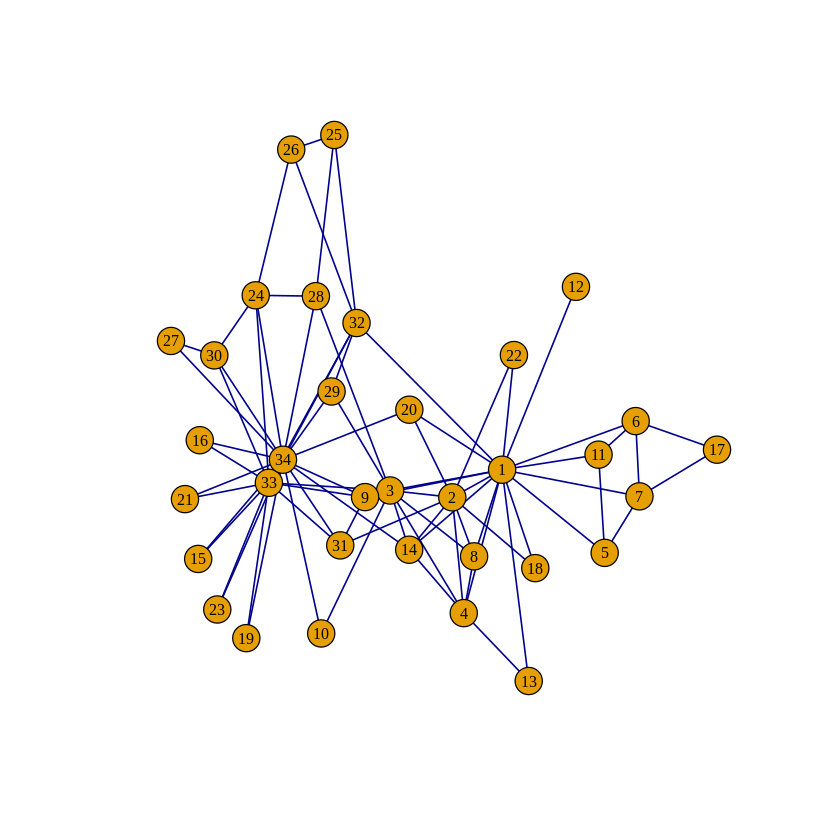

In [ ]:
plot(karate_network,
     edge.width = 1.3,
     edge.color = "darkblue",
     vertex.size = 10,
     vertex.label.cex = 0.8,
     vertex.label.color = "black")

# **Descriptives**

In this section, we will discover some basic network descriptives that can provide us with more information about the networks that we build.

## Density

Density is the **number of observed edges** in a network **over** the **maximum number of edges possible**. The value of network density can range from 0 to 1. Networks with a **higher density** are **more interconnected** and compact compared to networks with lower densities.

The maximum number of edges possible in a network is simply:

![picture](https://drive.google.com/uc?export=view&id=1ZHb_qt3dF9Vn3FoRXdfcwEcilpIToS9S)

Therefore, the density of a network is:

![picture](https://drive.google.com/uc?export=view&id=1UTEjlBGqgo7gifOStvhLbiNTfhB-gYcC)

**edge_density()** is the function to use if we need to compute network density.

In [ ]:
# find the density of the undirected friendship network
edge_density(undirected_network)

[1] 0.5333333

In [ ]:
# if you want to understand the algorithm better, do it manually as follows
N <- gorder(undirected_network) # number of nodes in the network
E <- gsize(undirected_network) # number of edges in the network
E/(N*(N-1)/2) # density

# the same value is obtained

[1] 0.5333333

## Paths
*   A path is a network **route** that runs from node to node along the network's edges.
*   Both directed and undirected networks can have paths defined.
*   Each edge traversed by a path in directed networks must be traversed in the correct direction for that edge.
*   Edges can be traversed in either direction for undirected networks.

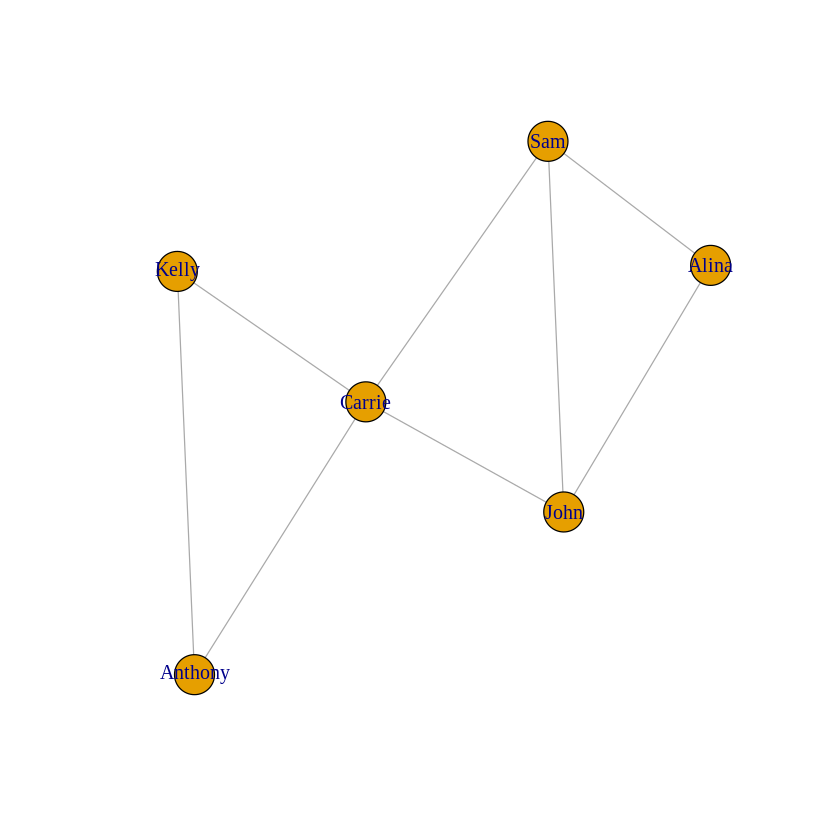

In [ ]:
plot(undirected_network)

### Distance

Geodesic distance or simply the distance between two nodes in a network, is the **minimum number of edges** that one has to go through in order to get **from one of the nodes to the other**.

For example, in the plot above:
*   The distance from John to Sam or from Sam to John is only 1. This is because there is a direct edge connecting them.
*   The distance from Anthony to Alina or from Alina to Anthony is 3. This is because the minimum number of edges that must be traversed to reach each other is 3. There are a few paths that can be taken such as (Anthony -> Carrie -> Sam -> Alina) or (Anthony -> Carrie -> John -> Alina).

**distances()** calculates the length of all the shortest paths from or to the nodes in the network. It outputs a matrix of all pairwise distances.







In [ ]:
distances(undirected_network)

,Sam,Alina,John,Carrie,Anthony,Kelly
Sam,0,1,1,1,2,2
Alina,1,0,1,2,3,3
John,1,1,0,1,2,2
Carrie,1,2,1,0,1,1
Anthony,2,3,2,1,0,1
Kelly,2,3,2,1,1,0


### Mean Distance

**mean_distance()** calculates the **average path length** in a network, by calculating the shortest paths between all pairs of nodes.

In [ ]:
mean_distance(undirected_network) # mean_distance

[1] 1.6

### Diameter

**diameter()** calculates the **length of the longest shortest path**. The pairwise matrix from earlier lets us know that the diameter of the network is 3.

In [ ]:
diameter(undirected_network)

[1] 3

# **Centrality Measures**

Centrality measures can help us to identify the most important nodes in a network. The four centrality measures that we will discuss in this section have different definitions and algorithms, leading to different results. It depends on us which centrality measure suits our needs.

For simplicity, we will focus only on undirected networks. Nodes are of higher importance if they have a higher centrality value (for the four centrality measures discussed in this section).

## Degree

Degree centrality measures the importance of nodes in a network based on the **number of edges connected to a node**. More influential nodes have more edges connected to them. All connections are rendered equal by degree centrality.

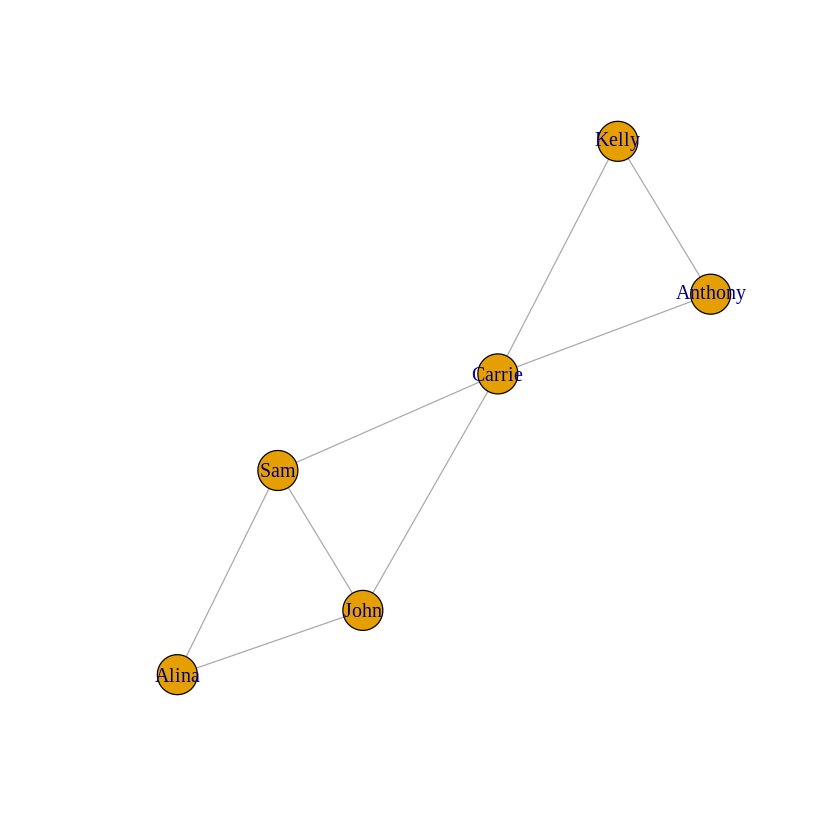

In [ ]:
plot(undirected_network)

In [ ]:
degree(undirected_network)

# We see that Sam has a degree of 3 since he is connected to
# Alina, John and Carrie.

Sam   Alina    John  Carrie Anthony   Kelly 
      3       2       3       4       2       2

In [ ]:
# we can sort the importance of the nodes based on degree centrality as follows
degree_centrality <- degree(undirected_network)
sort(degree_centrality) # this gives us the least to most important node

Alina Anthony   Kelly     Sam    John  Carrie 
      2       2       2       3       3       4

In [ ]:
# by setting "decreasing = TRUE", we obtain the most to least important node
sort(degree_centrality, decreasing = TRUE)

# Carrie is the most important individual based on degree centrality since she
# has the most number of friends (4).

Carrie     Sam    John   Alina Anthony   Kelly 
      4       3       3       2       2       2

## Eigenvector

A natural generalisation of degree centrality to increase the importance of nodes connected to other high-degree nodes is portrayed by eigenvector centrality. Eigenvector centrality determines influential vertices in terms of the number direct and indirect neighbours a node has, besides **rendering all nodes with unequal importance**, as some neighbours could contribute more influence than others.

In [ ]:
eigen_centrality(undirected_network)$vector

Sam     Alina      John    Carrie   Anthony     Kelly 
0.8782991 0.6180340 0.8782991 1.0000000 0.5428187 0.5428187

## Closeness

Closeness centrality is the **sum of the length of the shortest paths from a node to all other nodes**. **Central nodes are situated closer to other nodes**. Information can be transmitted more efficiently if nodes are closer to one another. This could however be a bad thing too, if virus was being spread in the network!

In [ ]:
closeness(undirected_network)

Sam     Alina      John    Carrie   Anthony     Kelly 
0.1428571 0.1000000 0.1428571 0.1666667 0.1111111 0.1111111

## Betweenness

Betweenness centrality **measures the extent to which a node lies on paths between other nodes**. Nodes that are considered influential according to betweenness centrality have the ability to **control information flow** in a network since they act as intermediaries. Without these high betweenness nodes, communication between other nodes in the network will be significantly disrupted.

In [ ]:
betweenness(undirected_network)

Sam   Alina    John  Carrie Anthony   Kelly 
    1.5     0.0     1.5     6.0     0.0     0.0

## Exercise 3

Find the **eigenvector centrality** values of the *karate_network* and sort the values in decreasing order. Save the eigenvector centrality values in a variable named *ev_centrality*.



In [ ]:
# Your Exercise 3 Answer

ev_centrality <- eigen_centrality(karate_network)$vector

sort(ev_centrality, decreasing = TRUE)

ERROR: ignored

# **Community Detection/Clustering**

Community detection or in other terms clustering, happens when there are groups of nodes that are **internally densely connected and externally sparsely connected**. This means that nodes which belong to a cluster have many edges connecting them, whereas there are less edges connecting nodes between different clusters.

The network below shows a clear cluster structure.

![picture](https://drive.google.com/uc?export=view&id=1zE2f8WAesQnJ3VyhpDPc50lj6VPx9vT8)

Source: [David Schoch](https://mr.schochastics.net/material/netAnaR//)


## Clustering Algorithms

There are a few clustering algorithms available in the igraph package. In this section we will use the **louvain** and **infomap** clustering algorithms.



In [ ]:
# compute clustering using louvain algorithm
clu_louvain <- cluster_louvain(karate_network)

In [ ]:
# compute clustering using infomap algorithm
clu_infomap <- cluster_infomap(karate_network)

## Membership

**memberhip()** gives the **division of the nodes into communities/clusters**. The top row of digits is each of the nodes in the network. The second row of digits returned show the community/cluster number of each node in the network.

In [ ]:
membership_louvain <- membership(clu_louvain)
membership_louvain

# we can see that there are 4 clusters in the karate network according to
# the louvain algorithm

 1  2  3  4  5  6  7  9 10 14 15 16 19 20 21 23 24 25 26 27 28 29 30 31 32 33 
 1  1  1  1  2  2  2  3  3  1  3  3  3  1  3  3  4  4  4  3  4  4  3  3  4  3 
 8 11 12 13 18 22 17 34 
 1  2  1  1  1  1  2  3 

In [ ]:
membership_infomap <- membership(clu_infomap)
membership_infomap

# we can see that there are 3 clusters in the karate network according to
# the infomap algorithm

 1  2  3  4  5  6  7  9 10 14 15 16 19 20 21 23 24 25 26 27 28 29 30 31 32 33 
 1  1  1  1  2  2  2  3  1  1  3  3  3  1  3  3  3  3  3  3  3  3  3  3  3  3 
 8 11 12 13 18 22 17 34 
 1  2  1  1  1  1  2  3 

## Modularity

Modularity measures the **strength of division** of a network **into communities/clusters**. A higher modularity value indicates better partitioning of nodes in the network.

In [ ]:
# compute the modularity scores of each algorithm to compare the quality of
# clustering
modularity_scores <- c(louvain = modularity(karate_network, membership(clu_louvain)),
                       infomap = modularity(karate_network, membership(clu_infomap)))
modularity_scores

# We notice that both the algorithms have nearly the same modularity scores.
# However, the modularity score for the louvain algorithm is slightly higher, so
# we choose it to plot our clusters.

louvain   infomap 
0.4197896 0.4020381

## Plot the Clusters

In the network visualisation below, we see four clusters in the network which are identified by different colours.

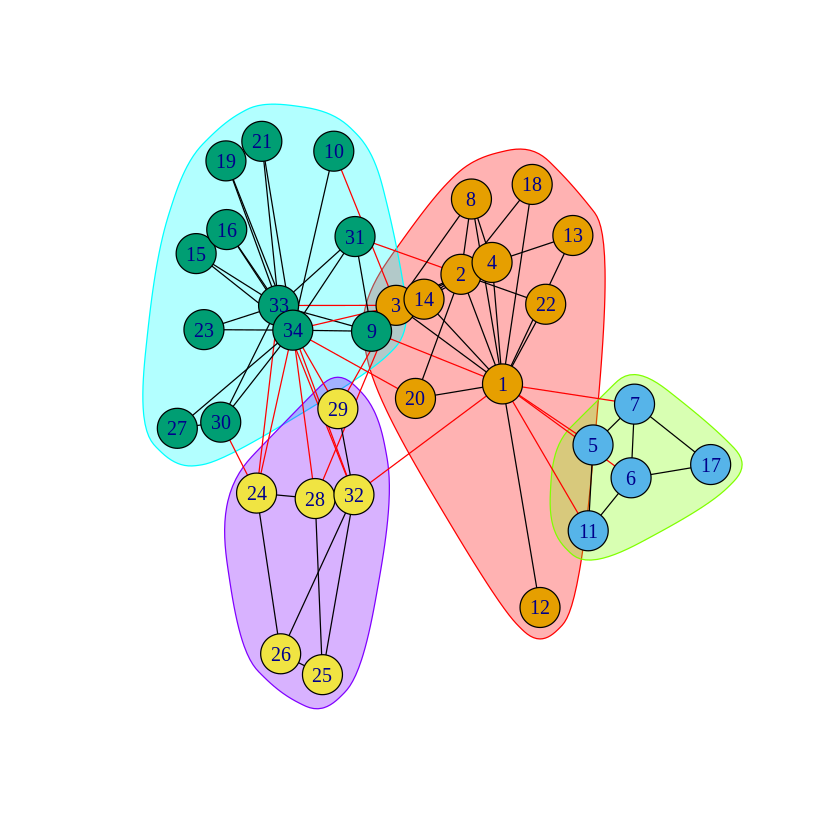

In [ ]:
plot(clu_louvain, karate_network)

# **Real Life Application: Threshold Network Approach to Evaluate Time Series Data of Stocks**

In this section, we will use a **data set** that consists of the **closing prices for the top 30 stocks in Bursa Malaysia for the year 2022**. Instead of plotting the network as it is, we will use the threshold method before plotting the network. This way we can use complex network analysis methods to study the relationship between these stocks. Have a look at the data set in excel to gain a better understanding of it.

When there are many nodes with many connections between them in a network, the network could appear very dense and it would be difficult for us to interpret. **With the threshold method, edges with weights below the threshold value set will be removed** and thus a more sparse and comprehensible network can be generated. In this example, we will be setting two different threshold values, namely the:

*   mean plus standard deviation of the correlation matrix
*   mean plus two standard deviations of the correlation matrix



In [ ]:
# load this library to use the read_excel() function,
# which can read in xlsx files
library(readxl)

In [ ]:
# load Excel sheet
data <- read_excel("/content/Threshold Data.xlsx", sheet = 1)

# define a function to find the log returns of closing prices
logreturnf <- function(x) {
  diff(log(x))
}

# remove "Date" column
data <- data[2:ncol(data)]

# compute log returns
data_returns <- sapply(data, logreturnf)

# this is a Pearson correlation
data_correlation <- cor(data_returns)

# full_network is an igraph object with all the edges
full_network <- graph_from_adjacency_matrix(data_correlation,
mode = "undirected", weighted = TRUE, diag = FALSE)

# set lower triangular matrix and diagonals to 0 to enable
# computation of threshold value
data_correlation[lower.tri(data_correlation, diag=TRUE)] <- 0

# threshold_value_1 = mean plus standard deviation of the correlation matrix
threshold_value_1 <- mean(data_correlation) + sd(data_correlation)

# remove edges with weights less than threshold_value_1
threshold_network_1 <- delete.edges(full_network, E(full_network)[(weight < threshold_value_1)])

# threshold_value_2 = mean plus 2 standard deviations of the correlation matrix
threshold_value_2 <- mean(data_correlation) + 2*sd(data_correlation)

# remove edges with weights less than threshold_value_2
threshold_network_2 <- delete.edges(full_network, E(full_network)[(weight < threshold_value_2)])

In [ ]:
threshold_value_1
threshold_value_2

# Notice how threshold_value_2 is bigger than threshold_value_1.
# Networks built using threshold_value_2 will be more sparse than networks
# built using threshold_value_1.
# Networks built using different threshold values will have the same number
# of nodes but a different number of edges.

[1] 0.2730334

[1] 0.4221284

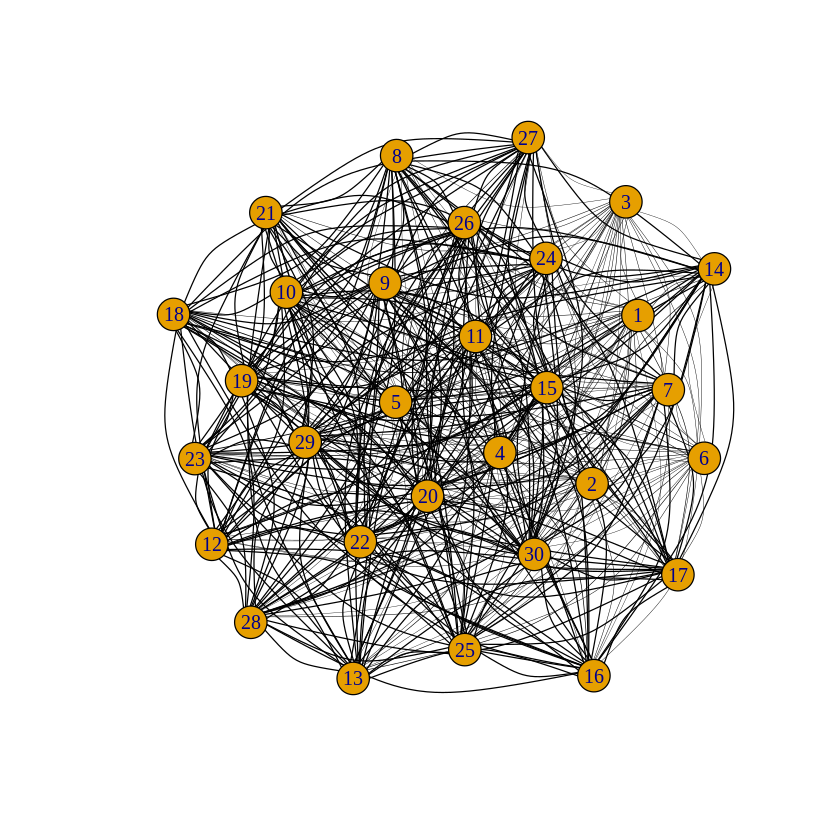

In [ ]:
# network without removing any edges
plot(full_network,
     edge.width = abs(E(threshold_network_1)$weight),
     edge.curved = 0.4,
     edge.color = "black",
     vertex.size = 12)

# the network looks really dense!

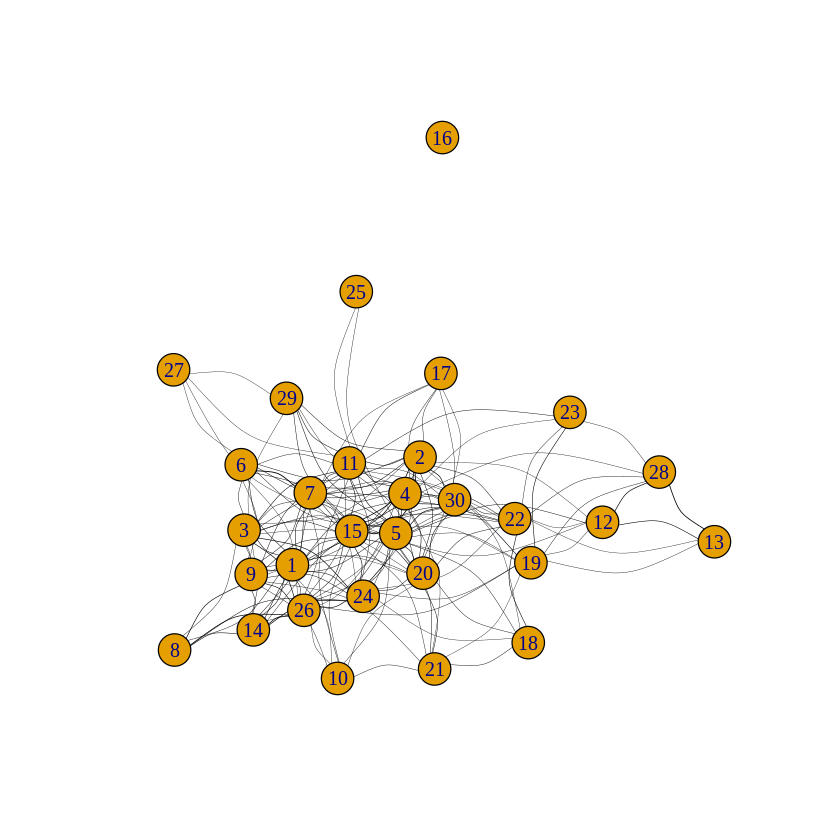

In [ ]:
# remove edges with weights less than threshold_value_1
plot(threshold_network_1,
     edge.width = abs(E(threshold_network_1)$weight),
     edge.curved = 0.4,
     edge.color = "black",
     vertex.size = 12)

# The network has less edges now.
# Stock number 16 has been disconnected,
# meaning that all its connections have low weight (correlation value).

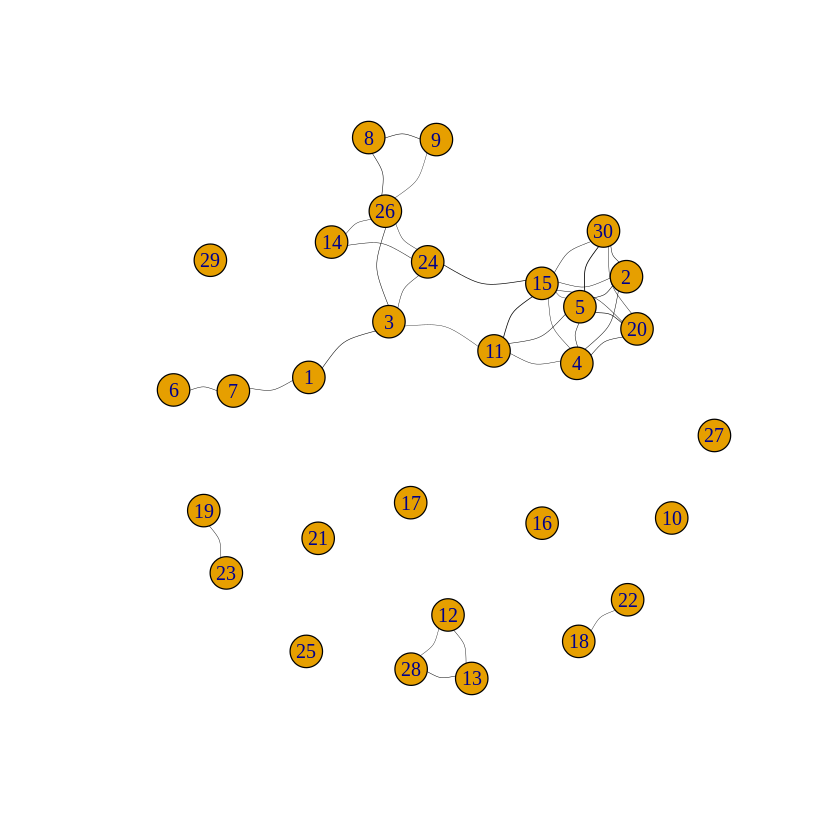

In [ ]:
# remove edges with weights less than threshold_value_2
plot(threshold_network_2,
     edge.width = abs(E(threshold_network_1)$weight),
     edge.curved = 0.4,
     edge.color = "black",
     vertex.size = 12)

# There are many singleton nodes (nodes with no connections)

You can also adjust the layouts of these plots to make them more attractive. Let's try a few layouts on *threshold_network_1*.

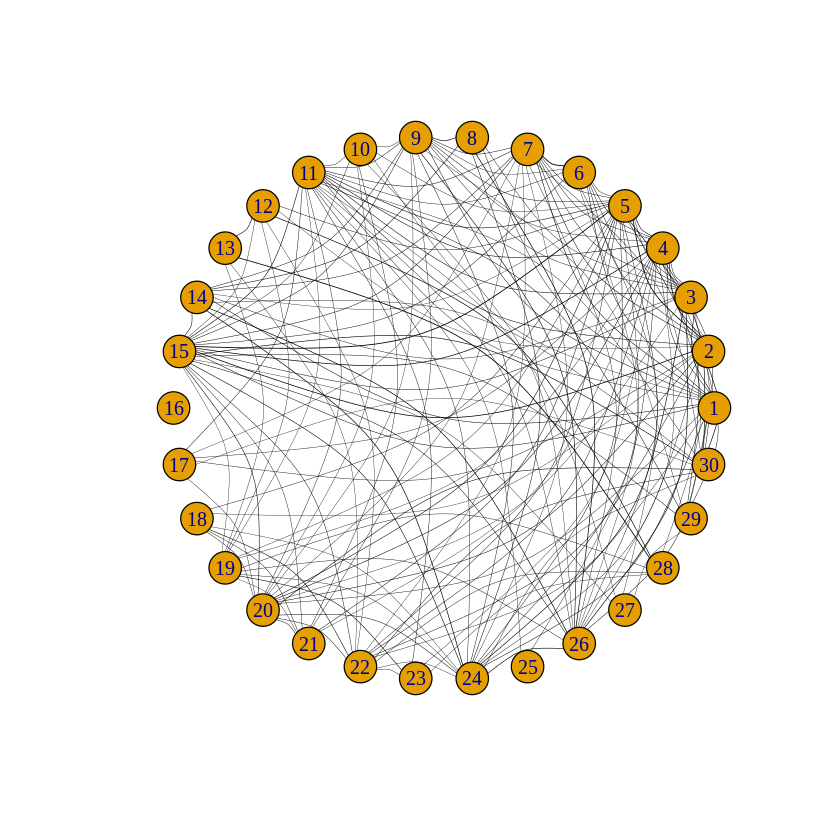

In [ ]:
# layout_in_circles: place nodes on a circle, in the order of their node ids
plot(threshold_network_1,
     layout = layout_in_circle(threshold_network_1),
     edge.width = abs(E(threshold_network_1)$weight),
     edge.curved = 0.4,
     edge.color = "black",
     vertex.size = 12)

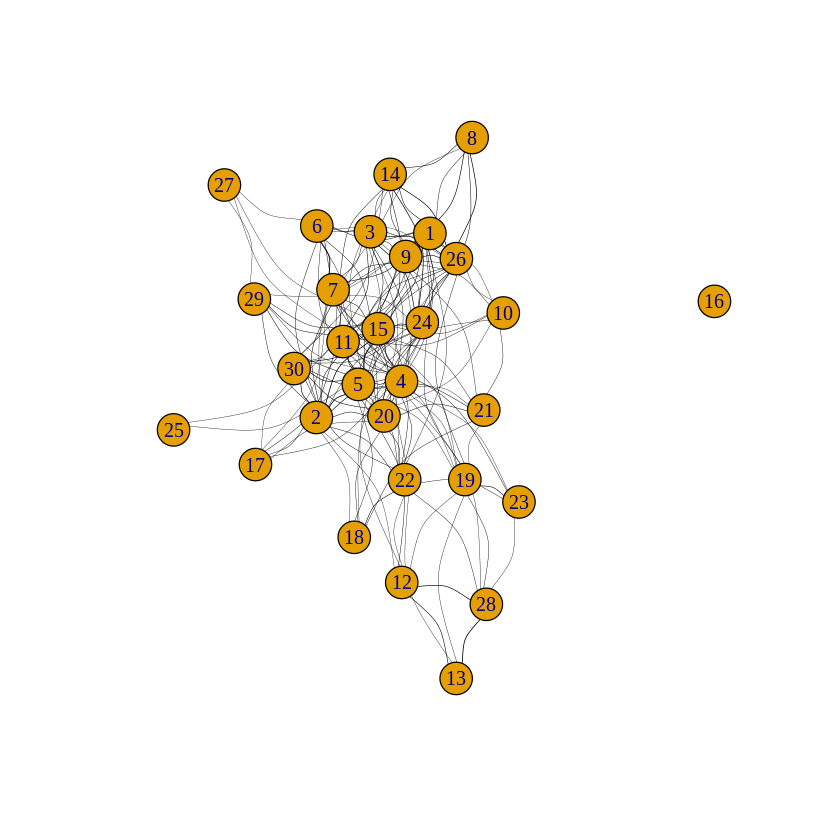

In [ ]:
# layout_with_fr: the Fruchterman-Reingold layout algorithm
plot(threshold_network_1,
     layout = layout_with_fr(threshold_network_1),
     edge.width = abs(E(threshold_network_1)$weight),
     edge.curved = 0.4,
     edge.color = "black",
     vertex.size = 12)

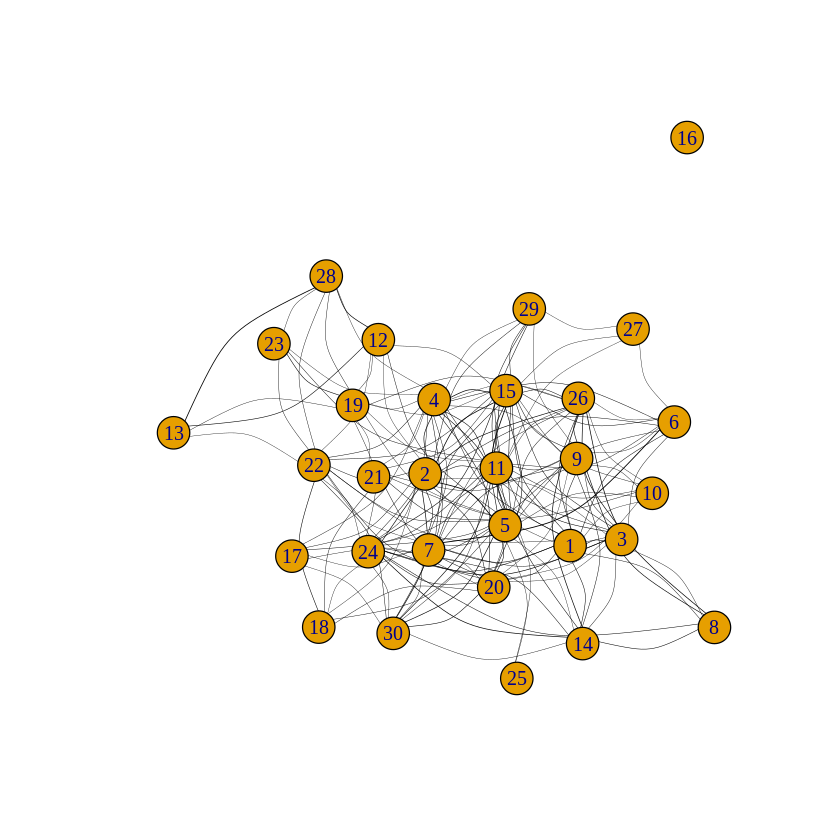

In [ ]:
# layout_with_kk: the Kamada-Kawai layout algorithm
plot(threshold_network_1,
     layout = layout_with_kk(threshold_network_1),
     edge.width = abs(E(threshold_network_1)$weight),
     edge.curved = 0.4,
     edge.color = "black",
     vertex.size = 12)

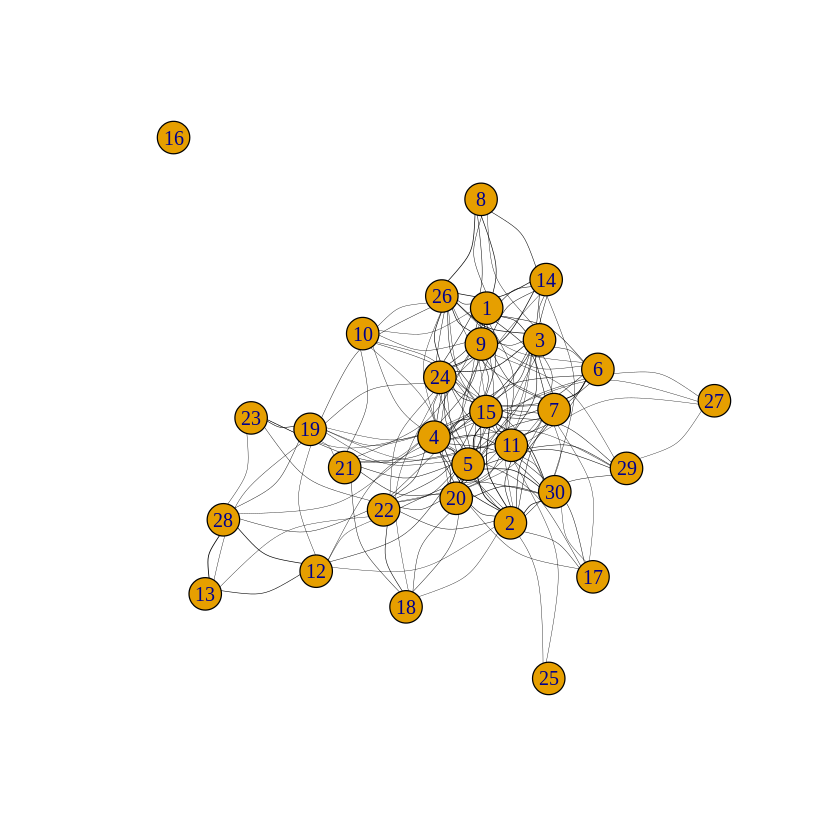

In [ ]:
# layout_nicely: this function tries to choose an appropriate network layout
# algorithm for the network, automatically
plot(threshold_network_1,
     layout = layout_nicely(threshold_network_1),
     edge.width = abs(E(threshold_network_1)$weight),
     edge.curved = 0.4,
     edge.color = "black",
     vertex.size = 12)

# References
1.   Luke, D. A. (2015). A User’s Guide to Network Analysis in R (2nd ed.). Springer. https://doi.org/10.1007/978-3-319-23883-8
2.   Newman, N.E.J. (2010). Networks: An Introduction. Oxford University Press. https://doi.org/10.1093/acprof:oso/9780199206650.001.0001
3.   Schoch, D. (2022, September 26). Basic Network Analysis in R. https://mr.schochastics.net/material/netAnaR//
4.   Hafizah Bahaludin (2023, February 15). An Introduction to Network Analysis in R. https://colab.research.google.com/github/HafizahBaha/BIOREM_Network/blob/main/BIOREM_An_Introduction_to_Network_Analysis_in_R.ipynb#scrollTo=PreQU6S1J8XN



**Thank you! Hope you enjoyed our session! 😀**